Loading dataset...
Number of cat images: 19
Number of dog images: 19

Model Performance:
Accuracy: 0.62
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       1.00      0.40      0.57         5

    accuracy                           0.62         8
   macro avg       0.75      0.70      0.62         8
weighted avg       0.81      0.62      0.61         8


Testing single image...


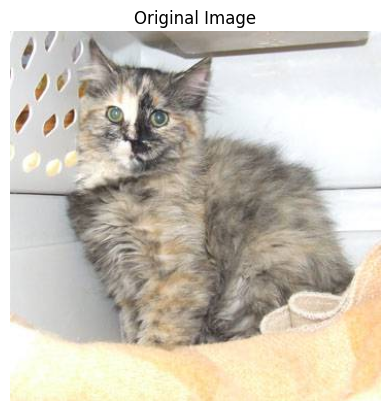

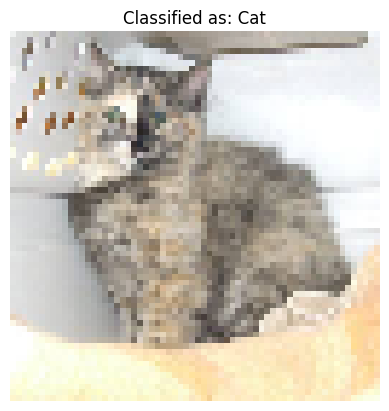

The image is classified as: Cat


In [4]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Image parameters
IMG_SIZE = 64  # Resize images to 64x64 for consistency

# Function to display an image
def show_image(title, image, is_grayscale=False):
    plt.figure()
    if is_grayscale:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load and preprocess dataset
def load_data(cat_dir, dog_dir, img_size):
    data, labels = [], []
    class_mapping = {"cat": 0, "dog": 1}
    total_images = {"cat": 0, "dog": 0}

    for class_label, directory in [("cat", cat_dir), ("dog", dog_dir)]:
        if not os.path.exists(directory):
            print(f"Error: Directory not found - {directory}")
            continue

        for img_name in os.listdir(directory):
            img_path = os.path.join(directory, img_name)

            # Verify file is an image
            if not img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                print(f"Skipping non-image file: {img_name}")
                continue

            # Load and preprocess the image
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)
            if img is None:
                print(f"Failed to load image: {img_path}")
                continue

            img = cv2.resize(img, (img_size, img_size))
            data.append(img)
            labels.append(class_mapping[class_label])
            total_images[class_label] += 1

    print(f"Number of cat images: {total_images['cat']}")
    print(f"Number of dog images: {total_images['dog']}")
    return np.array(data), np.array(labels)

# Train and evaluate SVM model
def train_evaluate_svm(data, labels, test_size=0.2, kernel='linear', C=1.0):
    # Normalize and flatten the dataset
    data = data / 255.0
    data = data.reshape(data.shape[0], -1)

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=test_size, random_state=42)

    # Train SVM
    svm_model = SVC(kernel=kernel, C=C, random_state=42)
    svm_model.fit(X_train, y_train)

    # Evaluate model
    y_pred = svm_model.predict(X_test)
    print("\nModel Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    return svm_model

# Classify a single image and display it
def classify_image(image_path, model, img_size=64):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)

    if img is None:
        print(f"Error: Unable to load image at {image_path}")
        return None

    # Display original image
    show_image("Original Image", img)

    # Preprocess the image
    img_resized = cv2.resize(img, (img_size, img_size))
    img_normalized = img_resized / 255.0  # Normalize
    img_flattened = img_normalized.flatten().reshape(1, -1)  # Flatten for SVM

    # Predict class
    prediction = model.predict(img_flattened)
    label = "Cat" if prediction[0] == 0 else "Dog"

    # Display resized image with classification
    show_image(f"Classified as: {label}", img_resized)
    return label

# Main function
def main():
    # Dataset directories
    cat_dir = "/content/sample_data/cats"  # Replace with your cat images directory
    dog_dir = "/content/sample_data/dogs"  # Replace with your dog images directory

    # Load data
    print("Loading dataset...")
    data, labels = load_data(cat_dir, dog_dir, IMG_SIZE)

    # Train and evaluate the model
    if data.size == 0 or labels.size == 0:
        print("Error: No valid images found in the dataset.")
        return

    svm_model = train_evaluate_svm(data, labels, test_size=0.2, kernel='linear', C=1.0)

    # Test the model on a new image
    test_image_path = "/content/sample_data/cats/cat.4005.jpg"  # Replace with the path to a test image
    print("\nTesting single image...")
    result = classify_image(test_image_path, svm_model, IMG_SIZE)
    if result:
        print(f"The image is classified as: {result}")

if __name__ == "__main__":
    main()
